In [6]:
!pip install gensim


In [7]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [8]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798075318336487), ('dogs', 0.834430992603302), ('pet', 0.7449565529823303), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307040214539), ('cats', 0.6471932530403137), ('rabbit', 0.6468629837036133)]
0.8798075


Part 1a

In [9]:

#find the most similar words to a word of your choice. 
similar_words = model.most_similar('computer')
print(similar_words)
#Does the result make sense? Look up some of the words if you don't know them
    ###Yes, all the results are one's I would have picked myself.
#Share and discuss with your group

[('computers', 0.8751983046531677), ('software', 0.8373122215270996), ('technology', 0.7642159461975098), ('pc', 0.7366448640823364), ('hardware', 0.7290390729904175), ('internet', 0.72867751121521), ('desktop', 0.7234441637992859), ('electronic', 0.7221828699111938), ('systems', 0.7197922468185425), ('computing', 0.7141730785369873)]


In [10]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827145099639893), ('france', 0.755802571773529), ('french', 0.7075164318084717), ('prohertrib', 0.6943174004554749), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627395629883), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.4533276855945587), ('non-arabs', 0.45208775997161865), ('amerindians', 0.4478239119052887), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768069267273), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835323572158813), ('pet', 0.6792976260185242), ('horses', 0.6774963736534119), ('pigs', 0.6755764484405518), ('animal', 0.6683686971664429)]


In [11]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.5003889799118042)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.4072844088077545), ('technicals', 0.40608730912208557), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454433441162)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089029550552368),
 ('doctors', 0.6793617606163025),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694241762161255),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466938257217407)]

Part 1b

In [12]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
    ###My Dimension will be "Wealth"
wealth = model["rich"] - model["poor"]
print(model.most_similar(model["teacher"] + wealth))
print(model.most_similar(model["artist"] + wealth))
print(model.most_similar(model["city"] + wealth))
#does this show any bias or assumptions in the data? 
    ###The model returns words that align with wealth stereotypes. Associating "teacher" with "professor" or "artist" with "singer-songwriter" after adding "wealth" are examples seen here.
# Discuss with your group and share most interesting dimension in the document

[('teacher', 0.6680964827537537), ('rich', 0.5727817416191101), ('writer', 0.5442888736724854), ('student', 0.5289104580879211), ('educator', 0.521625816822052), ('poet', 0.5188854932785034), ('friend', 0.517753541469574), ('taught', 0.5149722099304199), ('musician', 0.5136236548423767), ('author', 0.5125022530555725)]
[('artist', 0.785697877407074), ('artists', 0.6287317276000977), ('painter', 0.6222591996192932), ('musician', 0.6186785697937012), ('songwriter', 0.6092360615730286), ('art', 0.6023115515708923), ('filmmaker', 0.5950164198875427), ('sculptor', 0.5760811567306519), ('singer', 0.5693826675415039), ('singer-songwriter', 0.5685872435569763)]
[('city', 0.7578812837600708), ('town', 0.6408730149269104), ('rich', 0.629729151725769), ('southern', 0.6000362038612366), ('northern', 0.5800671577453613), ('cities', 0.579162061214447), ('where', 0.571696937084198), ('capital', 0.565071702003479), ('downtown', 0.5610560178756714), ('located', 0.5568658113479614)]


Part 2: Visualization and Embeddings in Space

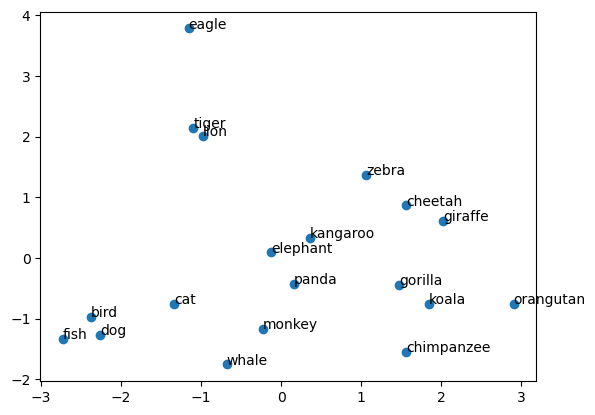

In [13]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

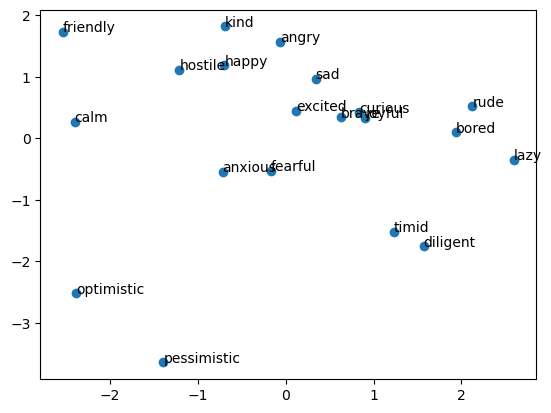

In [14]:
#repeat this process with your own set of 10-20 words. 
words = ["happy", "sad", "angry", "joyful", "fearful", "brave", "timid", "optimistic", "pessimistic", 
         "kind", "rude", "friendly", "hostile", "calm", "anxious", "excited", "bored", "curious", "lazy", "diligent"]
X = [model[word] for word in words]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))
plt.show()


#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
    ### Words like "happy," "joyful," and "excited" are close to each other
    ### Negative assiciation seem a bit more spread out



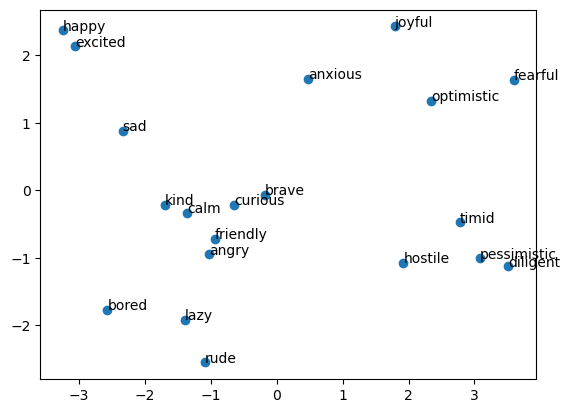

In [15]:
# repeat the process with a different pre-trained model and the same set of words. 
twitter_model= gensim.downloader.load("glove-twitter-100")
X_twitter = [twitter_model[word] for word in words]

pca = PCA(n_components=2)
X_twitter_pca = pca.fit_transform(X_twitter)

plt.scatter(X_twitter_pca[:, 0], X_twitter_pca[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (X_twitter_pca[i, 0], X_twitter_pca[i, 1]))
plt.show()
# What has changed in the embedding space? What might this have to do with the training data?
    ### This one is certianly less organized with associated word seeming randomly dispersed with less sense made in terms of associations among clusters.

Part 3: Embedding reddit posts

In [16]:

import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer

#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])






In [17]:
#using the code from project 1, clean the text and create a bag of words representation of the text.

language_model = spacy.load("en_core_web_sm")

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(clean)

data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(uiuc['lemmatized_text'])



KeyError: 'lemmatized_text'

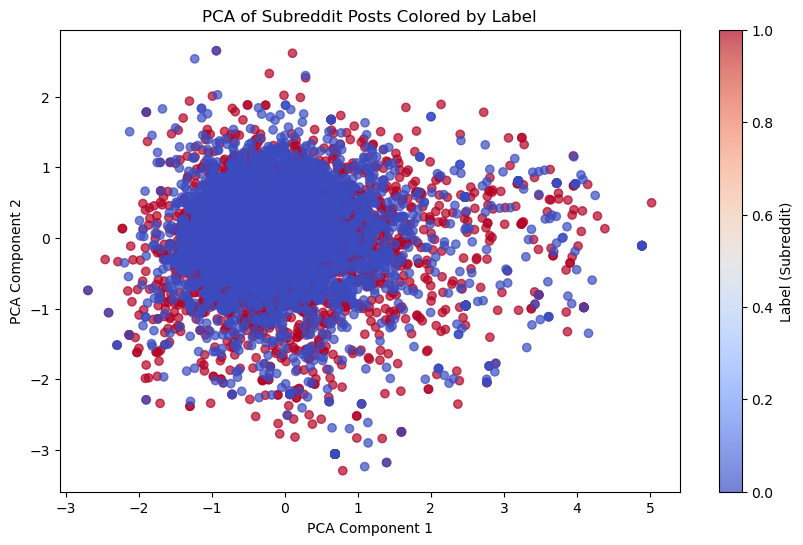

In [ ]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gensim.downloader as api



model = api.load("glove-wiki-gigaword-100")

def get_post_embedding(post):
    words = post.split()
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

data['embedding'] = data['lemmatized_text'].apply(get_post_embedding)
X = np.vstack(data['embedding'].values)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#color by the "label" column to see if the two subreddits are separable in the embedding space

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label="Label (Subreddit)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Subreddit Posts Colored by Label")
plt.show()

# is there a clear separation between the two columns? 

    ### Separation? No. However, it is evident that one has some more spread and variation.

In [ ]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

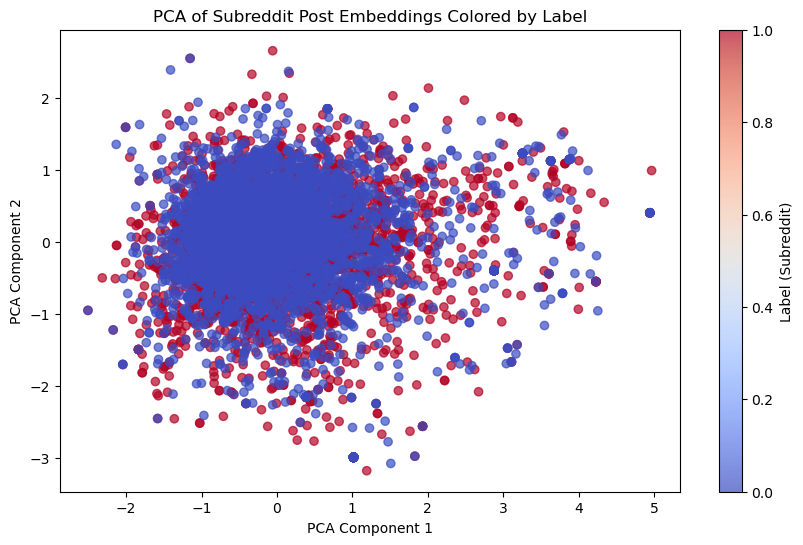

In [ ]:

#use this function to calculate the average embedding of each post in the dataset

def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

data['embedding'] = data['lemmatized_text'].apply(lambda x: avg_embedding(x, model))
data = data[data['embedding'].apply(lambda x: not np.isnan(x).any() and np.any(x))]
X = np.vstack(data['embedding'].values)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#plot the pca of the average embeddings, color by the "label" column

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label="Label (Subreddit)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Subreddit Post Embeddings Colored by Label")
plt.show()



#how is this plot different from the previous one?

    They are not identical but they are terribly similar.

#is there clear separation? 

    Same as the first example.

Part 4: HuggingFace and BERT

In [25]:

!pip install transformers --upgrade

In [26]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline(task="text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

### I WILL KEEP WORKING ON THIS BUT AS OF TODAY IM HAVING TROUBLE GETTING PIPELINE TO WORK


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [18]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

NameError: name 'pipe' is not defined

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [ ]:
#is the UIUC or Michigan subreddit more negative?